<h1 align="center">Machine Learning</h1><h2 align="center" style="margin:10px">Assignment</h2>

In [1]:
# Import all necessary libraries here
%matplotlib inline
import warnings; warnings.simplefilter('ignore');
import numpy as np
from scipy.io import loadmat
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
import time
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
import seaborn as sns

# Exercise 2: PCA

This exercise will depart from the equally famous mnist dataset. This is a ".mat" file, in order to load this file in an ipynb you have to use loadmat() function from scipy.io. (replace my path).

In [2]:
mnist = loadmat('mnist-original')
mnist_data = mnist["data"].T
mnist_label = mnist["label"][0]
print("Number of datapoints: {}\n".format(mnist_data.shape[0]))
print("Number of features: {}\n".format(mnist_data.shape[1]))
print("List of labels: {}\n".format(np.unique(mnist_label)))

Number of datapoints: 70000

Number of features: 784

List of labels: [0. 1. 2. 3. 4. 5. 6. 7. 8. 9.]



There are 70,000 images, and each image has 784 features. This is because each image is 28×28 pixels,
and each feature simply represents one pixel’s intensity, from 0 (white) to 255 (black). Let’s take a peek at one digit from the dataset. All you need to do is grab an instance’s feature vector, reshape it to a 28×28 array, and display it using Matplotlib’s `imshow()` function:

Value of datapoint no. 4:
[  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0  46 105 254 254 254 254 255 239  41
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0  37
 118 222 254 253 253 253 253 253 253 211  54   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0  14 200 253 253 254 253 253 253 253 253
 253 253 116   0   0   0   0   0   0   0   0   0   0   0   0   0  16 160
 236 253 253 253 254 253 

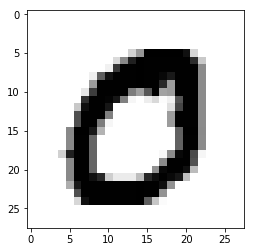

In [3]:
index = 4
print("Value of datapoint no. {}:\n{}\n".format(index, mnist_data[index]))
print("As image:\n")
plt.imshow(mnist_data[index].reshape(28, 28), cmap=plt.cm.gray_r)
plt.show()

##### a) Split the MNIST dataset into a training set and a test set. Use 60,000 instances for training and 10,000 for test.

In [4]:
X_train, X_test, y_train, y_test = train_test_split(mnist_data, mnist_label, train_size=60000, test_size=10000, random_state=42)
print("X_Train shape: {}, X_test shape: {}\ny_train shape: {}, y_test shape: {}"
      .format(X_train.shape, X_test.shape, y_train.shape, y_test.shape))

X_Train shape: (60000, 784), X_test shape: (10000, 784)
y_train shape: (60000,), y_test shape: (10000,)


#### b) Train a Random Forest classifier on the dataset and time how long it takes. Then evaluate the resulting model on the test set (disregarding "don't use test set")

In [5]:
# fit a random Forest Classifier with 100 number of estimators running 10 threads
clf = RandomForestClassifier(n_jobs=10, n_estimators=100, random_state=42)

start = time.time()
clf.fit(X_train, y_train)
end = time.time()
print("Elapsed time: {}".format(end - start))

Elapsed time: 12.227747678756714


In [6]:
#predict the label value using classifier
predicted_y = clf.predict(X_test)
predicted_y

array([7., 8., 6., ..., 9., 1., 6.])

In [7]:
print("Test score: {:.3f}".format(clf.score(X_test, y_test)))

Test score: 0.969


We observe the process time is 20.61 seconds when using the default number ofestimators (10) and the test score is 96,9% 

#### c) Use PCA to reduce the dataset’s dimensionality, with an explained variance ratio of 95%.

In [8]:
scaler = StandardScaler().fit(X_train)
X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)

# finding how many features are needed to get a variance ratio of 95%
pca = PCA(0.95, random_state=42)
X_pca = pca.fit_transform(X_train_scaled)

explained_variance_ratio = pca.explained_variance_ratio_
number_of_features = explained_variance_ratio.shape[0]

print("{} features account for {:2f} variance".format(number_of_features, explained_variance_ratio.sum()))

MemoryError: 

The dataset can be reduced to 330 features. We create new train and test datasets from the first 330 features 

In [9]:
pca = PCA(n_components=number_of_features, random_state=42)
X_train_pca = pca.fit_transform(X_train_scaled)
X_test_pca = pca.transform(X_test_scaled)

NameError: name 'number_of_features' is not defined

#### d) Train a new Random Forest classifier on the reduced dataset and see how long it takes. Was training much faster? 

#### Next evaluate the classifier on the test set: how does it compare to the previous classifier?

In [10]:
clf = RandomForestClassifier(n_jobs=10, n_estimators=100, random_state=42)
start = time.time()
clf.fit(X_train_pca, y_train)
end = time.time()
print("Elapsed time: {}".format(end - start))

NameError: name 'X_train_pca' is not defined

In [11]:
print("Test score: {:.3f}".format(clf.score(X_test_pca, y_test)))

NameError: name 'X_test_pca' is not defined

We observe the process time increases and the performance is also reduced to 93.7%.
We expected the process time to be faster since we have removed more than 50% of the initial features, and the test score matches our expectations.

#### e) Use t_SNE to reduce the MNIST dataset down to two dimensions and plot the result using Matplotlib. You can use a scatterplot using 10 different colors to represent each image’s target class. Alternatively, you can write colored digits at the location of each instance, or even plot scaled-down versions of the digit images themselves.

#### You should get a nice visualization with well-separated clusters of digits. Do the same using PCA and compare the resulting vizualisations. You can see examples in the course book pp. 168-169.

In [12]:
data, _, target, _ = train_test_split(mnist_data, mnist_label, random_state=42, train_size=5000)

tsne = TSNE(random_state=42) # default number of components is 2
tsne_results = tsne.fit_transform(data)

In [13]:
# define the colors that will be used for the t_sne and pca plots
colors = ["#476A2A", "#7851B8", "#BD3430", "#4A2D4E", "#875525", "#A83683", "#4E655E", "#853541", "#3A3120", "#535D8E"]

T_SNE plot

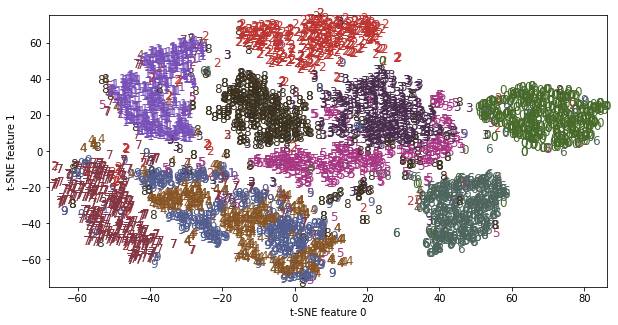

In [14]:
plt.figure(figsize=(10, 5))
plt.xlim(tsne_results[:, 0].min(), tsne_results[:, 0].max() + 1)
plt.ylim(tsne_results[:, 1].min(), tsne_results[:, 1].max() + 1)
for i in range(len(data)):
    # actually plot the digits as text instead of using scatter
    plt.text(tsne_results[i, 0], tsne_results[i, 1], int(target[i]), color = colors[int(target[i])], fontdict={'size': 12})
plt.xlabel("t-SNE feature 0")
plt.ylabel("t-SNE feature 1")
plt.show()

In the above plot we can see that separates the classes quite clearly using two components. There are some of the classes that are split up, like the *fours* and the *nines*, but most of the classes form a single dense group. There are also some *twos* that overlap with other classes.

**PCA plot**

In [19]:
pca = PCA(n_components=2)
X_train_pca = pca.fit_transform(X_train_scaled)

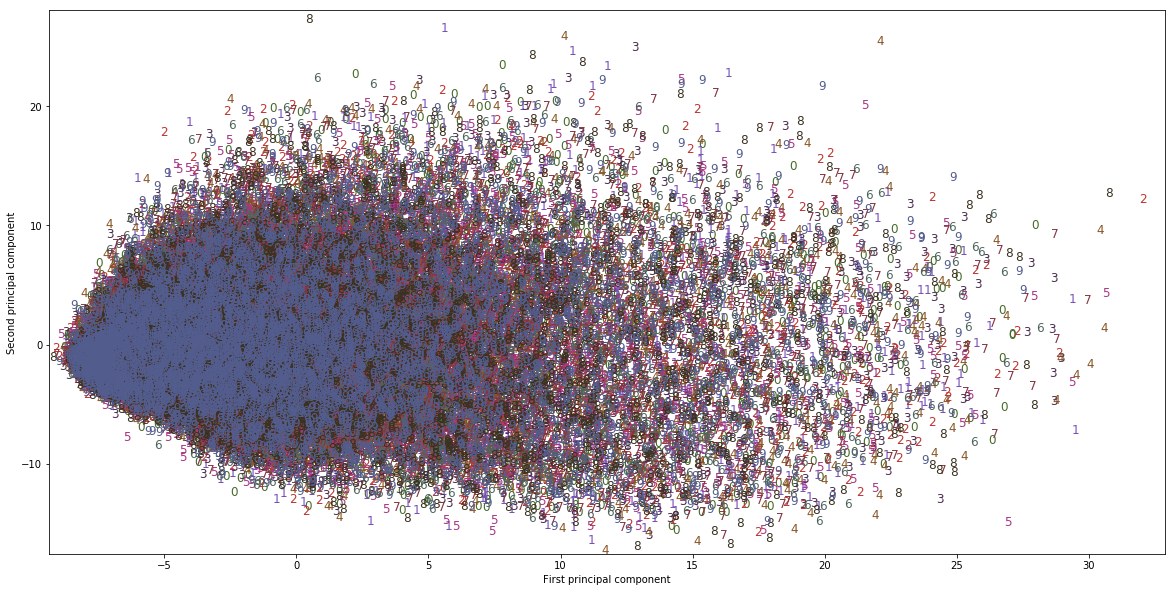

In [20]:
plt.figure(figsize=(20, 10))
plt.xlim(X_train_pca[:, 0].min(), X_train_pca[:, 0].max() + 1)
plt.ylim(X_train_pca[:, 1].min(), X_train_pca[:, 1].max() + 1)
for i in range(len(X_train_pca)):
    # actually plot the images as text instead of using scatter
    plt.text(X_train_pca[i, 0], X_train_pca[i, 1], int(mnist_label[i]), color = colors[int(mnist_label[i])], 
             fontdict={'size': 12})
plt.xlabel("First principal component")
plt.ylabel("Second principal component")
plt.show()

All the numbers overlap significantly and there is no clear separation between them. The result is quite worse compared to t_SNE.

#### f) These questions require no code.

##### - What are the main motivations for reducing a dataset’s dimensionality?
- Data visualization. It's easier to visualize data with fewer dimensions
- Machine learning algorithms run faster on low dimensional data.
- Reducing the dimensions and still maintain the structure of the data.

##### - What are the main drawbacks?

- Transformed features can be hard to interpret
- PCA can only capture linear structures in the features.

##### - Once a dataset’s dimensionality has been reduced, is it possible to reverse the operation? If so, how? If not, why?

Yes, we can use the `inverse_transform` method, which transforms the data back to its original space.

#####       - Can PCA be used to reduce the dimensionality of a highly nonlinear dataset? Explain.

No, because it creates linear combinations of the original features by finding a new set of dimensions such that all the dimensions are orthogonal (and hence linearly independent) and ranked according to the variance of data along them. And since it is based on linear systems, it does not fit well to non-linear datasets.

#####       - Suppose you perform PCA on a 1,000-dimensional dataset, setting the explained variance ratio to 95%. How many dimensions will the resulting dataset have?

It will have just enough features to represent 95% of the 'nature' of the dataset. But it depends on the data set, if the features are correlated and don't 'add' any extra information, these can be be left out and we should be able to explain 95% of variance with very few dimensions. However, if the dataset contains random data points, then the resulting dataset could have from 1 to 1000 dimensions in order to be able to explain 95% of the variance.

#####       - How can you evaluate the performance of a dimensionality reduction algorithm on your dataset?

By training and testing the model on the reduced feature dataset and see how it scores.